<font color=Red size=5><center>**Sentiment Analysis of IMDb Reviews**</center></font>


**Sentiment Analysis** is an automated procedure that can ascertain the emotional undertone of a message. It is a technique to do text analysis that helps you discover the sentiment a text has. The process of computationally recognizing and categorizing opinions contained in a piece of text, especially in order to discern whether the writer has a positive or negative attitude towards a certain topic. Sentiment analysis is powered by natural language processing (NLP) and machine learning (ML) algorithm.

<br>

**Database** : IMDB is a popular dataset of information for all visual entertainments. The database contains more than 50,000 entries of reviews posted on IMDB website coupled with a target variable that indicates whether a review has a positive sentiment or negative sentiment.



*Our Notebook contains code to preprocess and clean the reviews for feature preparation and model implementation for IMDB Review Sentiment Analysis using Logistic Regression Model and Recurrent Neural Network (RNN).*

<font color=blue size=4><center>**Part 1: Sentiment Analysis of IMDb Reviews with Logistic Regression**</font></center>


**Logistic Regression** is a classification model that uses input variables (features) to predict a categorical outcome variable (label) that can take on one of a limited set of class values. A binomial logistic regression is limited to two binary output categories, while a multinomial logistic regression allows for more than two classes. Examples of logistic regression include classifying a binary condition as “healthy”/“not healthy”, "positive"/"negative", or an image as “bicycle”/“train”/“car”/“truck”.
Logistic regression applies the logistic sigmoid function to weighted input values to generate a prediction of the data class.

<br>

**Logistic Regression** model estimates the probability of a dependent variable as a function of independent variables. The dependent variable is the output (label) that we are trying to predict, while the independent variables or features are the factors that we feel could influence the output.



**SETTING UP LIBRARIES**

In [1]:
#Importing Libraries

import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import re
from nltk.stem.porter import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pickle
from sklearn.linear_model import LogisticRegressionCV
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from plotly import graph_objs as go
from collections import Counter
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from keras.datasets import imdb
from keras import models
from keras import layers
from keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

**DATA IMPORT AND PRINTING HEAD**

In [2]:
df = pd.read_csv('movie_data.csv')
df.head(10)

,review,sentiment
0,"In 1974, the teenager Martha Moxley (Maggie Gr...",1
1,OK... so... I really like Kris Kristofferson a...,0
2,"***SPOILER*** Do not read this, if you think a...",0
3,hi for all the people who have seen this wonde...,1
4,"I recently bought the DVD, forgetting just how...",0
5,Leave it to Braik to put on a good show. Final...,1
6,Nathan Detroit (Frank Sinatra) is the manager ...,1
7,"To understand ""Crash Course"" in the right cont...",1
8,I've been impressed with Chavez's stance again...,1
9,This movie is directed by Renny Harlin the fin...,1


**SENTIMENT COUNT**

In [3]:
t = df.groupby('sentiment').count()['review'].reset_index().sort_values(by='review',ascending=False)
t.style.background_gradient(cmap='Blues')

,sentiment,review
1,1,10445
0,0,10311


**SENTIMENT COUNT VISUALIZATION**

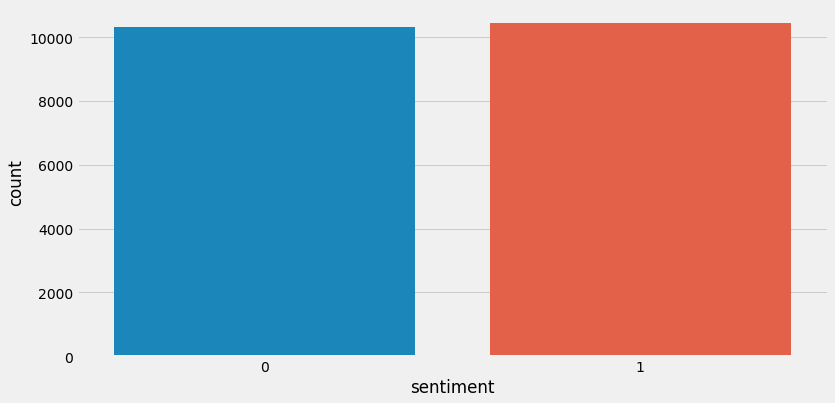

In [4]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [7]:
figure = go.Figure(go.Funnelarea(
    text =t.sentiment,
    values = t.review,
    title = {"position": "top center", "text": "Funnel-Chart of Sentiment Distribution"}
    ))
figure.show()

**Our data set has uniform distribution for both the binary labels**

**MOST COMMON WORDS SENTIMENT WISE**

In [12]:
df['temp_list'] = df['review'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
t = pd.DataFrame(top.most_common(20))
t.columns = ['Common_words','count']
t.style.background_gradient(cmap='Purples')

,Common_words,count
0,the,235262
1,a,127299
2,and,125431
3,of,116974
4,to,108156
5,is,84256
6,in,70964
7,I,54560
8,that,52343
9,this,46610


**MOST COMMON WORDS SENTIMENT WISE VISUALIZATION**

In [13]:
figure = px.bar(t, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
figure.show()

**TREEMAP OF MOST COMMON WORDS**

In [14]:
figure = px.treemap(t, path=['Common_words'], values='count',title='Tree of Most Common Words')
figure.show()

**BAG OF WORDS MODEL** - It is used to turn text files into numerical vectors or a bag of words.

In [15]:
count = CountVectorizer()
docs = (['The sun is shining',
         'The weather is sweet',
         'The sun is shining, the weather is sweet, and one and one is two'])
bag = count.fit_transform(docs)

print(count.vocabulary_)
print(bag.toarray())

{'the': 6, 'sun': 4, 'is': 1, 'shining': 3, 'weather': 8, 'sweet': 5, 'and': 0, 'one': 2, 'two': 7}
[[0 1 0 1 1 0 1 0 0]
 [0 1 0 0 0 1 1 0 1]
 [2 3 2 1 1 1 2 1 1]]


In [16]:
np.set_printoptions(precision=2)

tfidf = TfidfTransformer(use_idf=True, norm='l2', smooth_idf=True)

print(tfidf.fit_transform(bag).toarray())

[[0.   0.43 0.   0.56 0.56 0.   0.43 0.   0.  ]
 [0.   0.43 0.   0.   0.   0.56 0.43 0.   0.56]
 [0.5  0.45 0.5  0.19 0.19 0.19 0.3  0.25 0.19]]


**TEXT PREPROCESSING**

In [17]:
def preprocessor(text):
  text =re.sub('<[^>]*>', '', text)
  emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', text)
  text = re.sub('[\W]+', ' ', text.lower()) + ' '.join(emoticons).replace('-', '')
  
  return text

preprocessor("This is a :) test :-( !")


'this is a test :) :('

In [18]:
df['review'] = df['review'].apply(preprocessor)

**TEXT STEMMING**-
Stemming is a technique for eliminating affixes from words in order to retrieve the base form.

In [19]:
porter = PorterStemmer()

def tokenizer(text):
  return text.split()

def tokenizer_stemmer(text):
  return[porter.stem(word) for word in text.split()]

tokenizer('runners like running thus they run')

['runners', 'like', 'running', 'thus', 'they', 'run']

In [20]:
tokenizer_stemmer('runners like running thus they run')

['runner', 'like', 'run', 'thu', 'they', 'run']

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**REMOVING STOPWORDS** - 
Stop words are words that have little or no meaning, especially when synthesising meaningful aspects from the text.

In [22]:
stop = stopwords.words('english')
[w for w in tokenizer_stemmer('runners like running thus they run') if w not in stop]

['runner', 'like', 'run', 'thu', 'run']

**TERM FREQUENCY-INVERSE DOCUMENT FREQUENCY MODEL (TFIDF)** - 
It is used to convert text documents to matrix of tfidf features.

In [23]:
tfidf = TfidfVectorizer(strip_accents=None,
                         lowercase=True,
                         preprocessor=None,  # applied preprocessor in Data Cleaning
                         tokenizer=tokenizer_stemmer,
                         use_idf=True,
                         norm='l2',
                         smooth_idf=True)

y = df.sentiment.values
X = tfidf.fit_transform(df.review)

In [24]:
#split the dataset  
#train dataset
train_reviews=df.review[:18000]
train_sentiments=df.sentiment[:18000]
#test dataset
test_reviews=df.review[18000:]
test_sentiments=df.sentiment[18000:]
print(train_reviews.shape,train_sentiments.shape)
print(test_reviews.shape,test_sentiments.shape)

(18000,) (18000,)
(2756,) (2756,)


In [25]:
#normalized train reviews
norm_train_reviews=df.review[:40000]
norm_train_reviews[0]

'in 1974 the teenager martha moxley maggie grace moves to the high class area of belle haven greenwich connecticut on the mischief night eve of halloween she was murdered in the backyard of her house and her murder remained unsolved twenty two years later the writer mark fuhrman christopher meloni who is a former la detective that has fallen in disgrace for perjury in o j simpson trial and moved to idaho decides to investigate the case with his partner stephen weeks andrew mitchell with the purpose of writing a book the locals squirm and do not welcome them but with the support of the retired detective steve carroll robert forster that was in charge of the investigation in the 70 s they discover the criminal and a net of power and money to cover the murder murder in greenwich is a good tv movie with the true story of a murder of a fifteen years old girl that was committed by a wealthy teenager whose mother was a kennedy the powerful and rich family used their influence to cover the mur

<function matplotlib.pyplot.show>

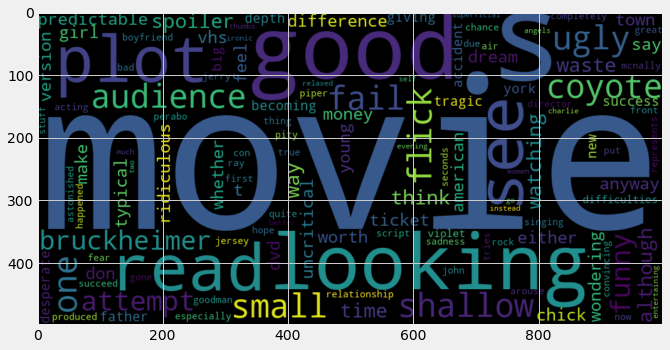

In [26]:
#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=norm_train_reviews[2]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')
plt.show

<function matplotlib.pyplot.show>

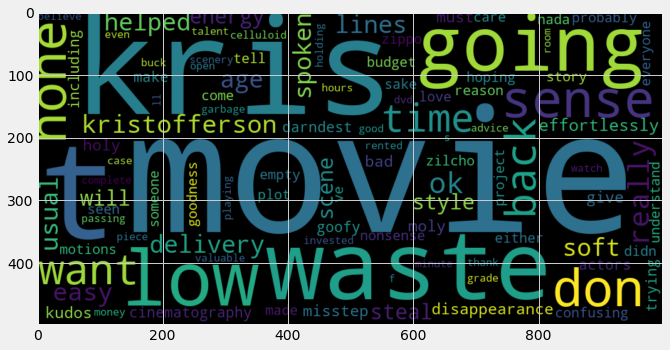

In [27]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=norm_train_reviews[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

**SPLITTING SENTIMENT DATA**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

clf = LogisticRegressionCV(cv=5,
                           scoring='accuracy',
                           random_state=0,
                           n_jobs=-1,
                           verbose=3,
                           max_iter=300).fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   55.4s finished


In [29]:
clf.score(X_test, y_test)

0.8811909809211794

In [30]:
print(X_test)
print(y_test)

  (0, 15641)	0.2036823376572059
  (0, 16807)	0.3436343085606673
  (0, 20798)	0.15349870288030995
  (0, 38172)	0.15104454796838407
  (0, 16614)	0.1309939919284305
  (0, 21186)	0.08942690581463322
  (0, 9650)	0.12688439438385496
  (0, 2765)	0.12052745666754294
  (0, 11737)	0.11370368847108163
  (0, 35009)	0.12760760503735183
  (0, 15102)	0.07585417867385867
  (0, 26126)	0.07163760028264708
  (0, 44918)	0.0843177012836392
  (0, 28748)	0.08051591340180084
  (0, 31834)	0.09876681884955238
  (0, 36430)	0.13615356553520683
  (0, 21691)	0.09797260226489576
  (0, 10254)	0.08901202279268688
  (0, 16033)	0.06372685372403285
  (0, 44286)	0.21086869919630438
  (0, 34991)	0.10099654769207517
  (0, 10299)	0.0857161998157888
  (0, 39439)	0.10490548958483868
  (0, 21576)	0.0897279036253443
  (0, 31533)	0.061802435605652774
  :	:
  (10377, 18024)	0.02717988402418796
  (10377, 29634)	0.012028798612041872
  (10377, 18399)	0.016425128827665145
  (10377, 44180)	0.030979847457476
  (10377, 37799)	0.056030566

In [31]:
saved_model = open('saved_model.sav', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

In [32]:
yhat = clf.predict(X_test)
yhat

array([1, 1, 0, ..., 1, 1, 1])

**CONFUSION MATRIX** -  A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.

In [33]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[4730  563]
 [ 670 4415]]


**PLOTTING CONFUSION MATRIX FOR LOGISTIC REGRESSION MODEL**

Confusion matrix, without normalization
[[4730  563]
 [ 670 4415]]


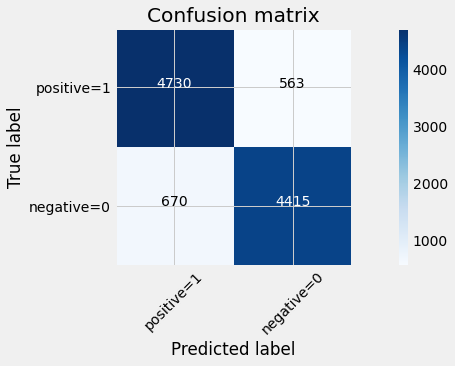

In [34]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

**Confusion matrix** and the efficiency metric indicate that our LR model has performed well.

<font color=blue size=4><center>**Part 2: Sentiment Analysis of IMDb Reviews with RNN Model**</font></center>



**Recurrent Neural Network (RNN)** works on the principle of saving the output of a particular layer and feeding this back to the input in order to predict the output of the layer.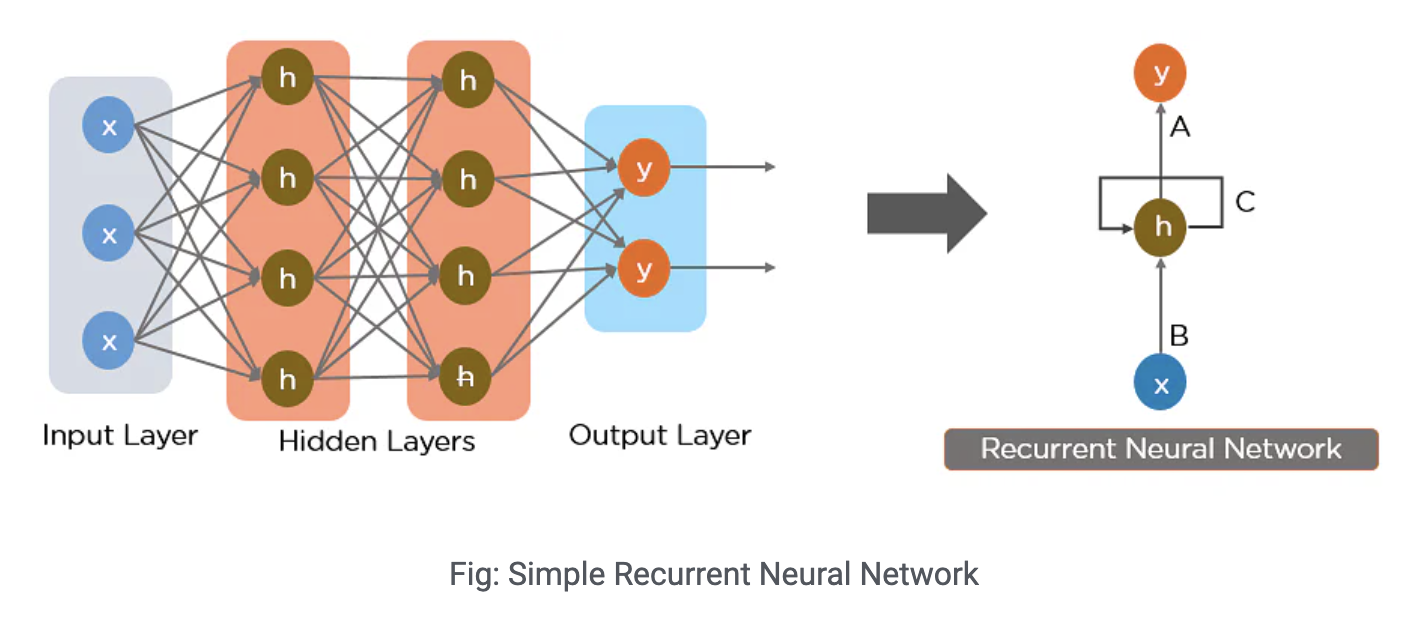

The nodes in different layers of the neural network are compressed to form a single layer of recurrent neural networks. A, B, and C are the parameters of the network.
Here, “x” is the input layer, “h” is the hidden layer, and “y” is the output layer. A, B, and C are the network parameters used to improve the output of the model. At any given time t, the current input is a combination of input at x(t) and x(t-1). The output at any given time is fetched back to the network to improve on the output.

**Why Recurrent Neural Networks?**

<br>

**RNN** were created because there were a few issues in the feed-forward neural network:

1. Cannot handle sequential data
2. Considers only the current input
3. Cannot memorize previous inputs

The solution to these issues is the RNN. It can handle sequential data, accepting the current input data, and previously received inputs and can memorize previous inputs due to their internal memory.

In [35]:
max_features = 10000  # Only include top 10,000 words in the vocabulary
maxlen = 500  # Cut off each review after 500 words
batch_size = 32

In [36]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words = max_features)

17473536/17464789 [==============================] - 0s 0us/step


In [37]:
y_train[1], y_train[2], y_test[4]

(0, 0, 1)

**PADDING THE DATA SO THAT EACH SEQUENCE IS OF EXACTLY 500 WORDS**

In [38]:
X_train = pad_sequences(X_train, maxlen = maxlen)
X_test = pad_sequences(X_test, maxlen = maxlen)

In [39]:
model = models.Sequential()
model.add(layers.Embedding(max_features, 32, input_length = maxlen))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Conv1D(32, 5, activation = 'relu'))
model.add(layers.MaxPooling1D(3))
model.add(layers.Dropout(0.2))
model.add(layers.CuDNNGRU(32))  # return_sequences = False
model.add(layers.Dense(1, activation = 'sigmoid'))

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 conv1d (Conv1D)             (None, 496, 32)           5152      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 165, 32)          0         
 )                                                               
                                                                 
 conv1d_1 (Conv1D)           (None, 161, 32)           5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 53, 32)           0         
 1D)                                                             
                                                                 
 dropout (Dropout)           (None, 53, 32)            0

**COMPILING OUR MODEL**

In [41]:
model.compile(loss = 'binary_crossentropy', optimizer = 'rmsprop', metrics = ['acc'])# Compiling the Model

In [42]:
history = model.fit(X_train, y_train, batch_size = batch_size, epochs = 15, validation_split = 0.2)

Epoch 1/15
625/625 [==============================] - 19s 8ms/step - loss: 0.4403 - acc: 0.7771 - val_loss: 0.2981 - val_acc: 0.8746
Epoch 2/15
625/625 [==============================] - 5s 7ms/step - loss: 0.2499 - acc: 0.9021 - val_loss: 0.3322 - val_acc: 0.8714
Epoch 3/15
625/625 [==============================] - 4s 7ms/step - loss: 0.1932 - acc: 0.9280 - val_loss: 0.2721 - val_acc: 0.8894
Epoch 4/15
625/625 [==============================] - 4s 7ms/step - loss: 0.1545 - acc: 0.9424 - val_loss: 0.3209 - val_acc: 0.8838
Epoch 5/15
625/625 [==============================] - 5s 8ms/step - loss: 0.1232 - acc: 0.9566 - val_loss: 0.3459 - val_acc: 0.8716
Epoch 6/15
625/625 [==============================] - 4s 7ms/step - loss: 0.0860 - acc: 0.9718 - val_loss: 0.3263 - val_acc: 0.8864
Epoch 7/15
625/625 [==============================] - 5s 8ms/step - loss: 0.0588 - acc: 0.9806 - val_loss: 0.4035 - val_acc: 0.8782
Epoch 8/15
625/625 [==============================] - 4s 7ms/step - loss: 0

**CALCULATING LOSS AND ACCURACY**

In [44]:
loss = history.history['loss']
validation_loss = history.history['val_loss']
accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']

**PLOTTING TRAINING AND VALIDATION LOSS**

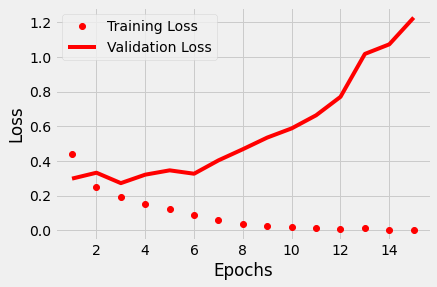

In [48]:
epochs = range(1, 16)
plt.plot(epochs, loss, 'go', label = 'Training Loss',color='red')
plt.plot(epochs, validation_loss, 'g', label = 'Validation Loss',color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

**PLOTTING TRAINING AND VALIDATION ACCURACY**

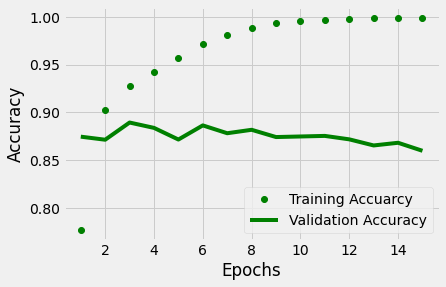

In [49]:
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuarcy',color='green')
plt.plot(epochs, validation_accuracy, 'b', label = 'Validation Accuracy',color='green')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**TESTING OUR MODEL**

In [50]:
model.evaluate(X_test, y_test)

782/782 [==============================] - 3s 4ms/step - loss: 1.3572 - acc: 0.8487


[1.3572406768798828, 0.8487200140953064]

In [51]:
yhat = model.predict(X_test)
yhat

array([[4.56e-08],
       [1.00e+00],
       [1.00e+00],
       ...,
       [9.40e-08],
       [9.01e-01],
       [6.07e-04]], dtype=float32)

In [52]:
for i in range(len(yhat)):
  if yhat[i] > 0.5:
    yhat[i] = 1
  else:
    yhat[i] = 0

**CONFUSION MATRIX FOR RNN MODEL**

Confusion matrix, without normalization
[[11240  1260]
 [ 2522  9978]]


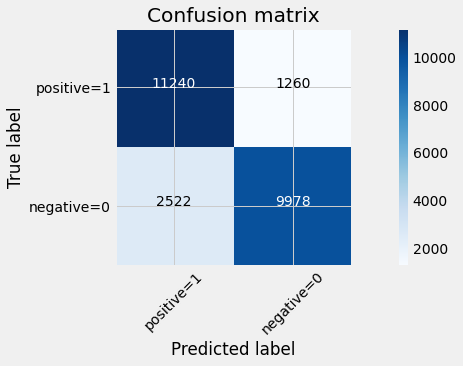

In [53]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

**Confusion matrix** and the efficiency metric indicate that our RNN model has performed well.

<font color=blue size=4><center>**Part 3: Sentiment Analysis of IMDb Reviews with LSTM Model**</font></center>



**Long Short-Term Memory (LSTM)** networks is special kind of recurrent neural network that is capable of learning long term dependencies in data. This is achieved because the recurring module of the model has a combination of four layers interacting with each other. Such a recurrent neural network (RNN) can process not only single data points , but also entire sequences of data.
networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem  that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs. The LSTM architecture aims to provide a short-term memory for RNN that can last thousands of timesteps, thus "long short-term memory".

<br>


**IMPORTING OUR DATA**

In [54]:
data = pd.read_csv("movie_data.csv")

In [ ]:
data['review'] = data['review'].apply(lambda x: x.lower())
data['review'] = data['review'].apply((lambda x: re.sub('[^a-zA-z0-9\s]','',x)))

print(data[ data['sentiment'] == 0].size)
print(data[ data['sentiment'] == 1].size)

for idx,row in data.iterrows():
    row[0] = row[0].replace('rt',' ')
    
max_fatures = 2000
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts(data['review'].values)
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X)

20622
20890


**PRINTING THE DATA**

In [ ]:
print(data)

                                                  review  sentiment
0      in 1974 the teenager martha moxley maggie grac...          1
1      ok so i really like kris kristofferson and his...          0
2      spoiler do not read this if you think about wa...          0
3      hi for all the people who have seen this wonde...          1
4      i recently bought the dvd forgetting just how ...          0
...                                                  ...        ...
20751  it was foolishly with some degree of relish th...          0
20752  a chemist develops a fabric that never gets di...          1
20753  while borisaleksey batalovis off to fight in w...          1
20754  i remember first watching sabrina when it came...          1
20755  i was lucky enough to watch this without any p...          1

[20756 rows x 2 columns]


**IMPLEMENTATION OF THE MODEL**

In [ ]:
embed_dim = 128
lstm_out = 196

model = Sequential()
model.add(Embedding(max_fatures, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 1866, 128)         256000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 1866, 128)        0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 196)               254800    
                                                                 
 dense_1 (Dense)             (None, 2)                 394       
                                                                 
Total params: 511,194
Trainable params: 511,194
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.33, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(13906, 1866) (13906, 2)
(6850, 1866) (6850, 2)


In [ ]:
batch_size = 32
model.fit(X_train, Y_train, epochs = 1, batch_size=batch_size, verbose = 2)

435/435 - 3226s - loss: 0.5201 - accuracy: 0.7357 - 3226s/epoch - 7s/step


In [ ]:
validation_size = 1500

X_validate = X_test[-validation_size:]
Y_validate = Y_test[-validation_size:]
X_test = X_test[:-validation_size]
Y_test = Y_test[:-validation_size]
score,acc = model.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

168/168 - 78s - loss: 0.4055 - accuracy: 0.8258 - 78s/epoch - 467ms/step
score: 0.41
acc: 0.83


In [ ]:
print(X_test.shape)
print(Y_test.shape)

(5350, 1866)
(5350, 2)


In [ ]:
yhat = model.predict(X_test)
yhat

array([[0.97, 0.03],
       [0.98, 0.02],
       [0.93, 0.07],
       ...,
       [0.86, 0.14],
       [0.95, 0.05],
       [0.18, 0.82]], dtype=float32)

In [ ]:
print(yhat.shape)
print(Y_test.shape)

(5350, 2)
(5350, 2)


In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(yhat, axis=1),labels=[1,0]))

[[2352  334]
 [ 598 2066]]


Confusion matrix, without normalization
[[2352  334]
 [ 598 2066]]


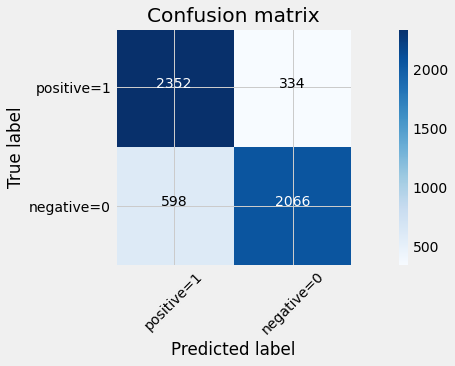

In [ ]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(np.argmax(Y_test,axis=1), np.argmax(yhat, axis=1),labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(13,5))
plot_confusion_matrix(cnf_matrix, classes=['positive=1','negative=0'],normalize= False,  title='Confusion matrix')

**Confusion matrix** indicate that our LSTM model has performed well.